In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
import numpy as np

In [3]:
# loading the raw data
df = pd.read_csv("../data/raw_data.csv")

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
# keep required columns
columns= ['bedrooms','bathrooms','floors', 'waterfront','view', 'condition', 'yr_renovated', 'yr_built', 'sqft_lot', 'sqft_living', 'sqft_above','sqft_basement', 'city', 'price' ]
df = df[columns]
df

,bedrooms,bathrooms,floors,waterfront,view,condition,yr_renovated,yr_built,sqft_lot,sqft_living,sqft_above,sqft_basement,city,price
0,3.0,1.50,1.5,0,0,3,2005,1955,7912,1340,1340,0,Shoreline,3.130000e+05
1,5.0,2.50,2.0,0,4,5,0,1921,9050,3650,3370,280,Seattle,2.384000e+06
2,3.0,2.00,1.0,0,0,4,0,1966,11947,1930,1930,0,Kent,3.420000e+05
3,3.0,2.25,1.0,0,0,4,0,1963,8030,2000,1000,1000,Bellevue,4.200000e+05
4,4.0,2.50,1.0,0,0,4,1992,1976,10500,1940,1140,800,Redmond,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,5.0,3.25,2.0,0,0,5,0,1977,12353,3690,3690,0,Lake Forest Park,0.000000e+00
4395,4.0,1.00,1.5,0,0,3,1994,1948,7200,1530,1400,130,Seattle,1.353333e+05
4396,4.0,2.50,2.0,0,0,3,0,2000,3750,2110,2110,0,Seattle,5.774375e+05
4397,3.0,1.75,1.0,0,0,3,2001,1956,4333,2150,1200,950,Seattle,4.408250e+05


In [7]:
# drop rows that has zero in price or #bathrooms, #bedrooms
df = df[df['price'] != 0]
df = df[df['bathrooms'] != 0]
df = df[df['bedrooms'] != 0]
df

,bedrooms,bathrooms,floors,waterfront,view,condition,yr_renovated,yr_built,sqft_lot,sqft_living,sqft_above,sqft_basement,city,price
0,3.0,1.50,1.5,0,0,3,2005,1955,7912,1340,1340,0,Shoreline,3.130000e+05
1,5.0,2.50,2.0,0,4,5,0,1921,9050,3650,3370,280,Seattle,2.384000e+06
2,3.0,2.00,1.0,0,0,4,0,1966,11947,1930,1930,0,Kent,3.420000e+05
3,3.0,2.25,1.0,0,0,4,0,1963,8030,2000,1000,1000,Bellevue,4.200000e+05
4,4.0,2.50,1.0,0,0,4,1992,1976,10500,1940,1140,800,Redmond,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,3.0,1.00,1.0,0,0,4,1999,1951,4800,1250,1250,0,Seattle,3.264286e+05
4395,4.0,1.00,1.5,0,0,3,1994,1948,7200,1530,1400,130,Seattle,1.353333e+05
4396,4.0,2.50,2.0,0,0,3,0,2000,3750,2110,2110,0,Seattle,5.774375e+05
4397,3.0,1.75,1.0,0,0,3,2001,1956,4333,2150,1200,950,Seattle,4.408250e+05


In [8]:
# transforming columns
# 1. yr_build to age of house
df.insert(df.columns.get_loc('yr_built'), 'age', 2025 - df['yr_built'])
# 2. yr_renovated to binary feature
df.insert(df.columns.get_loc('yr_renovated'), 'was_renovated',
          np.where(df['yr_renovated'] > 0, 1, 0))
# drop columns
df.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)
df

,bedrooms,bathrooms,floors,waterfront,view,condition,was_renovated,age,sqft_lot,sqft_living,sqft_above,sqft_basement,city,price
0,3.0,1.50,1.5,0,0,3,1,70,7912,1340,1340,0,Shoreline,3.130000e+05
1,5.0,2.50,2.0,0,4,5,0,104,9050,3650,3370,280,Seattle,2.384000e+06
2,3.0,2.00,1.0,0,0,4,0,59,11947,1930,1930,0,Kent,3.420000e+05
3,3.0,2.25,1.0,0,0,4,0,62,8030,2000,1000,1000,Bellevue,4.200000e+05
4,4.0,2.50,1.0,0,0,4,1,49,10500,1940,1140,800,Redmond,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,3.0,1.00,1.0,0,0,4,1,74,4800,1250,1250,0,Seattle,3.264286e+05
4395,4.0,1.00,1.5,0,0,3,1,77,7200,1530,1400,130,Seattle,1.353333e+05
4396,4.0,2.50,2.0,0,0,3,0,25,3750,2110,2110,0,Seattle,5.774375e+05
4397,3.0,1.75,1.0,0,0,3,1,69,4333,2150,1200,950,Seattle,4.408250e+05


In [9]:
# apply log transform
skewed = ['price', 'sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement']
df[skewed] = np.log1p(df[skewed])
df

,bedrooms,bathrooms,floors,waterfront,view,condition,was_renovated,age,sqft_lot,sqft_living,sqft_above,sqft_basement,city,price
0,3.0,1.50,1.5,0,0,3,1,70,8.976262,7.201171,7.201171,0.000000,Shoreline,12.653962
1,5.0,2.50,2.0,0,4,5,0,104,9.110631,8.202756,8.122965,5.638355,Seattle,14.684291
2,3.0,2.00,1.0,0,0,4,0,59,9.388319,7.565793,7.565793,0.000000,Kent,12.742569
3,3.0,2.25,1.0,0,0,4,0,62,8.991064,7.601402,6.908755,6.908755,Bellevue,12.948012
4,4.0,2.50,1.0,0,0,4,1,49,9.259226,7.570959,7.039660,6.685861,Redmond,13.217675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,3.0,1.00,1.0,0,0,4,1,74,8.476580,7.131699,7.131699,0.000000,Seattle,12.695969
4395,4.0,1.00,1.5,0,0,3,1,77,8.881975,7.333676,7.244942,4.875197,Seattle,11.815504
4396,4.0,2.50,2.0,0,0,3,0,25,8.229778,7.654917,7.654917,0.000000,Seattle,13.266357
4397,3.0,1.75,1.0,0,0,3,1,69,8.374246,7.673688,7.090910,6.857514,Seattle,12.996406


In [10]:
# post transformation check
skew = df.select_dtypes(include='number').skew().sort_values(ascending=False)
kurt = df.select_dtypes(include='number').kurt().sort_values(ascending=False)
print("\nSkewness:")
print(skew)
print("\nKurtosis:")
print(kurt)


Skewness:
waterfront       12.175634
view              3.348622
condition         0.966482
sqft_lot          0.851458
bathrooms         0.612835
floors            0.548985
age               0.509230
bedrooms          0.499872
sqft_basement     0.431458
was_renovated     0.384401
price             0.356195
sqft_above        0.237107
sqft_living      -0.053040
dtype: float64

Kurtosis:
waterfront       146.312816
view              10.513113
sqft_lot           2.658968
price              2.184949
bathrooms          1.867025
bedrooms           1.284864
condition          0.237067
sqft_living        0.068747
sqft_above        -0.373572
floors            -0.562745
age               -0.661491
sqft_basement     -1.762693
was_renovated     -1.853082
dtype: float64


In [11]:
# handling outliers
outlier_summary = {}
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # count outliers
    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_percentage = 100 * outlier_count / len(df)
    outlier_summary[col] = {"count": outlier_count, "percent": outlier_percentage}

outlier_df = pd.DataFrame(outlier_summary).T.sort_values(by="percent", ascending=False)
print(outlier_df)

               count    percent
sqft_lot       506.0  11.544604
view           435.0   9.924709
bathrooms      127.0   2.897559
bedrooms       111.0   2.532512
price           76.0   1.733972
waterfront      29.0   0.661647
sqft_living     26.0   0.593201
sqft_above      10.0   0.228154
condition        6.0   0.136893
floors           0.0   0.000000
was_renovated    0.0   0.000000
age              0.0   0.000000
sqft_basement    0.0   0.000000


In [12]:
# clip the top and bottom
for col in ['sqft_lot', 'view']:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = df[col].clip(lower, upper)

df

,bedrooms,bathrooms,floors,waterfront,view,condition,was_renovated,age,sqft_lot,sqft_living,sqft_above,sqft_basement,city,price
0,3.0,1.50,1.5,0,0,3,1,70,8.976262,7.201171,7.201171,0.000000,Shoreline,12.653962
1,5.0,2.50,2.0,0,4,5,0,104,9.110631,8.202756,8.122965,5.638355,Seattle,14.684291
2,3.0,2.00,1.0,0,0,4,0,59,9.388319,7.565793,7.565793,0.000000,Kent,12.742569
3,3.0,2.25,1.0,0,0,4,0,62,8.991064,7.601402,6.908755,6.908755,Bellevue,12.948012
4,4.0,2.50,1.0,0,0,4,1,49,9.259226,7.570959,7.039660,6.685861,Redmond,13.217675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,3.0,1.00,1.0,0,0,4,1,74,8.476580,7.131699,7.131699,0.000000,Seattle,12.695969
4395,4.0,1.00,1.5,0,0,3,1,77,8.881975,7.333676,7.244942,4.875197,Seattle,11.815504
4396,4.0,2.50,2.0,0,0,3,0,25,8.229778,7.654917,7.654917,0.000000,Seattle,13.266357
4397,3.0,1.75,1.0,0,0,3,1,69,8.374246,7.673688,7.090910,6.857514,Seattle,12.996406


In [13]:
# feature selection
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [14]:
X

,bedrooms,bathrooms,floors,waterfront,view,condition,was_renovated,age,sqft_lot,sqft_living,sqft_above,sqft_basement,city
0,3.0,1.50,1.5,0,0,3,1,70,8.976262,7.201171,7.201171,0.000000,Shoreline
1,5.0,2.50,2.0,0,4,5,0,104,9.110631,8.202756,8.122965,5.638355,Seattle
2,3.0,2.00,1.0,0,0,4,0,59,9.388319,7.565793,7.565793,0.000000,Kent
3,3.0,2.25,1.0,0,0,4,0,62,8.991064,7.601402,6.908755,6.908755,Bellevue
4,4.0,2.50,1.0,0,0,4,1,49,9.259226,7.570959,7.039660,6.685861,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,3.0,1.00,1.0,0,0,4,1,74,8.476580,7.131699,7.131699,0.000000,Seattle
4395,4.0,1.00,1.5,0,0,3,1,77,8.881975,7.333676,7.244942,4.875197,Seattle
4396,4.0,2.50,2.0,0,0,3,0,25,8.229778,7.654917,7.654917,0.000000,Seattle
4397,3.0,1.75,1.0,0,0,3,1,69,8.374246,7.673688,7.090910,6.857514,Seattle


In [15]:
y

0       12.653962
1       14.684291
2       12.742569
3       12.948012
4       13.217675
          ...    
4393    12.695969
4395    11.815504
4396    13.266357
4397    12.996406
4398    12.180760
Name: price, Length: 4383, dtype: float64

In [16]:
print(X.info())
print("-----------")
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4383 entries, 0 to 4398
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       4383 non-null   float64
 1   bathrooms      4383 non-null   float64
 2   floors         4383 non-null   float64
 3   waterfront     4383 non-null   int64  
 4   view           4383 non-null   int64  
 5   condition      4383 non-null   int64  
 6   was_renovated  4383 non-null   int64  
 7   age            4383 non-null   int64  
 8   sqft_lot       4383 non-null   float64
 9   sqft_living    4383 non-null   float64
 10  sqft_above     4383 non-null   float64
 11  sqft_basement  4383 non-null   float64
 12  city           4383 non-null   object 
dtypes: float64(7), int64(5), object(1)
memory usage: 479.4+ KB
None
-----------
<class 'pandas.core.series.Series'>
Index: 4383 entries, 0 to 4398
Series name: price
Non-Null Count  Dtype  
--------------  -----  
4383 non-null   float64

In [17]:
# encoding categorical Data (city)
ct = ColumnTransformer(transformers=[('city_encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), [12])], remainder='passthrough')
X_transformed = np.array(ct.fit_transform(X))
print(X_transformed, X_transformed.shape, X_transformed.dtype)

[[0.         0.         0.         ... 7.20117088 7.20117088 0.        ]
 [0.         0.         0.         ... 8.20275638 8.12296472 5.63835467]
 [0.         0.         0.         ... 7.56579328 7.56579328 0.        ]
 ...
 [0.         0.         0.         ... 7.65491705 7.65491705 0.        ]
 [0.         0.         0.         ... 7.67368813 7.09090982 6.85751406]
 [0.         0.         0.         ... 8.58316818 8.22710823 7.37838371]] (4383, 55) float64


In [18]:
# encoding categorical Data (city) 2nd Solution
df = pd.get_dummies(df, columns=['city'], drop_first=True)

In [19]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.2, random_state=42, shuffle=True)

In [20]:
X_train

array([[0.        , 0.        , 0.        , ..., 7.43307535, 7.04838641,
        6.29341928],
       [0.        , 0.        , 0.        , ..., 7.56579328, 6.93828448,
        6.80350526],
       [0.        , 0.        , 0.        , ..., 8.15794351, 8.15794351,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 6.76964198, 6.76964198,
        0.        ],
       [0.        , 0.        , 0.        , ..., 7.66434663, 7.2730926 ,
        6.53813982],
       [0.        , 0.        , 0.        , ..., 7.30720231, 6.7580945 ,
        6.44730586]], shape=(3506, 55))

In [21]:
# feature scaling
sc = StandardScaler()
cols = [43,44,45,47,48,50,51,52,53,54]
X_train[:,cols] = sc.fit_transform(X_train[:,cols])
X_test[:,cols] = sc.transform(X_test[:,cols])

In [22]:
print(X_train, X_train.shape, X_train.dtype)
print('-----------')
print(X_test, X_test.shape, X_test.dtype)

[[ 0.          0.          0.         ... -0.32901188 -0.83955733
   1.15204324]
 [ 0.          0.          0.         ... -0.0205555  -1.09336362
   1.31122015]
 [ 0.          0.          0.         ...  1.35569041  1.71818702
  -0.8118748 ]
 ...
 [ 0.          0.          0.         ... -1.87093051 -1.48211731
  -0.8118748 ]
 [ 0.          0.          0.         ...  0.20849726 -0.32156597
   1.22841048]
 [ 0.          0.          0.         ... -0.62155968 -1.50873648
   1.20006493]] (3506, 55) float64
-----------
[[ 0.          0.          0.         ... -0.15687201  0.21796118
  -0.8118748 ]
 [ 0.          0.          1.         ...  0.4565316   0.82636182
  -0.8118748 ]
 [ 0.          0.          0.         ... -0.3016847   0.0743296
  -0.8118748 ]
 ...
 [ 0.          0.          0.         ... -0.09391719  0.28040254
  -0.8118748 ]
 [ 0.          0.          0.         ... -0.65294638 -0.27406717
  -0.8118748 ]
 [ 0.          0.          1.         ...  1.08036327  0.00596178
  

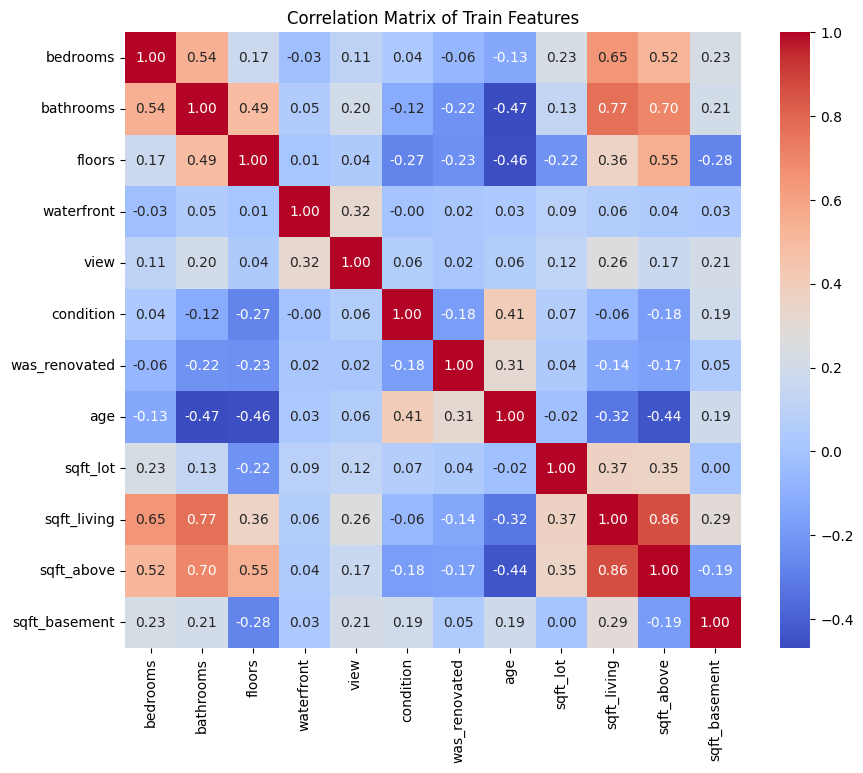

In [23]:
# compute correlation matrix
# 0.0-0.3 -> Weak
# 0.3-0.5 -> Moderate 
# 0.5-0.7 -> Strong
# 0.7-0.9 -> Very strong
# > 0.9   -> Extremely Strong   
feature_names = ct.get_feature_names_out()
remainder_feature_names = [f.replace('remainder__', '') for f in feature_names if f.startswith('remainder__')]
X_train_df = pd.DataFrame(X_train[:,43:], columns=remainder_feature_names)

# correlation matrix
corr = X_train_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Train Features")
plt.show()

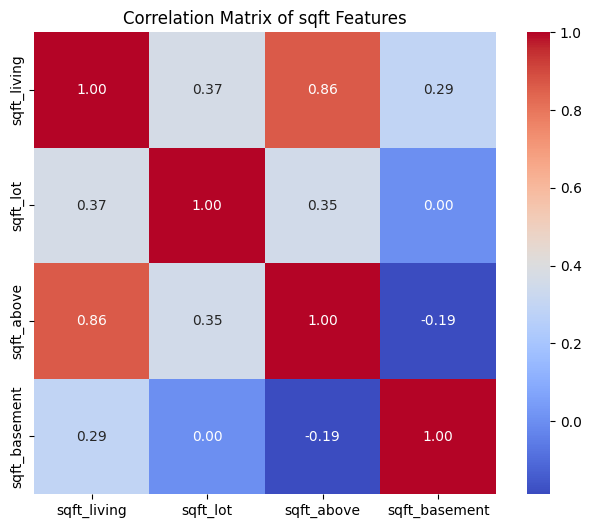

In [24]:
# compute correlation matrix for a subgroup
sqft_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
corr_sqft = X_train_df[sqft_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_sqft, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of sqft Features")
plt.show()

In [25]:
# check for multicollinearity
# VIF (Variance Inflation Factor)
# VIF 1-5  Mild or no correlation
# VIF 5-10 Moderate correlation
# VIF >10  Severe multicollinearity

# Add intercept
X_const = add_constant(X_train_df)

vif_data = pd.DataFrame({
    'Feature': X_const.columns,
    'VIF': [variance_inflation_factor(X_const.values, i)
            for i in range(X_const.shape[1])]
})
print(vif_data.sort_values('VIF', ascending=False))

          Feature        VIF
10    sqft_living  27.024869
11     sqft_above  26.313905
12  sqft_basement   6.724298
2       bathrooms   3.294725
3          floors   2.384109
8             age   1.921978
0           const   1.884742
1        bedrooms   1.845518
9        sqft_lot   1.626498
6       condition   1.442539
7   was_renovated   1.299918
5            view   1.251203
4      waterfront   1.129609


In [26]:
sqft_df = X_train_df[sqft_cols]

# add constant
sqft_df_const = add_constant(sqft_df)
vif_sqft = pd.DataFrame({
    'Feature': sqft_df_const.columns,
    'VIF': [variance_inflation_factor(sqft_df_const.values, i)
            for i in range(sqft_df_const.shape[1])]
})
print(vif_sqft.sort_values('VIF', ascending=False))

         Feature        VIF
1    sqft_living  24.290033
3     sqft_above  22.649525
4  sqft_basement   6.345691
2       sqft_lot   1.173595
0          const   1.000000


In [27]:
X_reduced = X_train_df.drop(columns=['sqft_above'])

X_reduced_const = add_constant(X_reduced)
vif = pd.DataFrame({
    'Feature': X_reduced_const.columns,
    'VIF': [variance_inflation_factor(X_reduced_const.values, i)
            for i in range(X_reduced_const.shape[1])]
})
print(vif.sort_values("VIF", ascending=False))

          Feature       VIF
10    sqft_living  4.061946
2       bathrooms  3.244217
3          floors  2.212683
8             age  1.919985
0           const  1.884729
1        bedrooms  1.825696
11  sqft_basement  1.643842
9        sqft_lot  1.597407
6       condition  1.433412
7   was_renovated  1.299918
5            view  1.248966
4      waterfront  1.127517


In [28]:
X_train = np.delete(X_train, 53, axis=1)
X_test = np.delete(X_test, 53, axis=1)
X_train

array([[ 0.        ,  0.        ,  0.        , ..., -1.78226765,
        -0.32901188,  1.15204324],
       [ 0.        ,  0.        ,  0.        , ...,  0.04559702,
        -0.0205555 ,  1.31122015],
       [ 0.        ,  0.        ,  0.        , ..., -0.15297687,
         1.35569041, -0.8118748 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.35497111,
        -1.87093051, -0.8118748 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.26932566,
         0.20849726,  1.22841048],
       [ 0.        ,  0.        ,  0.        , ..., -0.8275492 ,
        -0.62155968,  1.20006493]], shape=(3506, 54))

In [29]:
# save everything in one .npz file
np.savez(
    "../data/processed_data.npz",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)


In [30]:
# post Preprocessing Check
from scipy.stats import skew, kurtosis

In [31]:
# load processed data
data = np.load("../data/processed_data.npz")
X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]

In [32]:
# basic statistics
print("Shape:", X_train[:,43:].shape)
print("Mean:", np.mean(X_train[:,43:], axis=0))
print("Median:", np.median(X_train[:,43:], axis=0))
print("Std deviation:", np.std(X_train[:,43:], axis=0))
print("Min:", np.min(X_train[:,43:], axis=0))
print("Max:", np.max(X_train[:,43:], axis=0))
print("Range:", np.ptp(X_train[:,43:], axis=0))

Shape: (3506, 11)
Mean: [ 1.36165402e-16  1.40725360e-16  2.55547627e-16  6.27495722e-03
  3.64828279e-16 -2.51810995e-16  4.02738163e-01  8.13192449e-17
 -2.77967419e-16  8.73105226e-16 -4.39845916e-16]
Median: [-0.43768517  0.1142211  -0.02744094  0.         -0.30521885 -0.66317149
  0.         -0.17133952 -0.05937684  0.03885852 -0.8118748 ]
Std deviation: [1.         1.         1.         0.0789657  1.         1.
 0.49044891 1.         1.         1.         1.        ]
Min: [-2.65040934 -1.82348462 -0.95251707  0.         -0.30521885 -3.63451879
  0.         -1.44589124 -2.29306646 -3.85445283 -0.8118748 ]
Max: [6.20048734 5.60438732 3.67286362 1.         4.92114152 2.3081758
 1.         2.37776392 3.61440282 3.81112805 1.65726794]
Range: [8.85089668 7.42787194 4.62538069 1.         5.22636037 5.94269459
 1.         3.82365516 5.90746929 7.66558088 2.46914274]


In [33]:
# count missing values
print("NaN count per column:", np.isnan(X_train[:,43:]).sum(axis=0))

NaN count per column: [0 0 0 0 0 0 0 0 0 0 0]


In [34]:
# percentiles
q25 = np.percentile(X_train[:,43:], 25, axis=0)
q50 = np.percentile(X_train[:,43:], 50, axis=0)
q75 = np.percentile(X_train[:,43:], 75, axis=0)

print("25%:", q25)
print("50% (median):", q50)
print("75%:", q75)

25%: [-0.43768517 -0.53168081 -0.95251707  0.         -0.30521885 -0.66317149
  0.         -0.87569705 -0.53023819 -0.6807721  -0.8118748 ]
50% (median): [-0.43768517  0.1142211  -0.02744094  0.         -0.30521885 -0.66317149
  0.         -0.17133952 -0.05937684  0.03885852 -0.8118748 ]
75%: [ 0.66867691  0.43717206  0.8976352   0.         -0.30521885  0.82250215
  1.          0.66718135  0.33478833  0.68951396  1.18486425]


In [35]:
print("Skewness:", skew(X_train[:,43:], axis=0))
print("Kurtosis:", kurtosis(X_train[:,43:], axis=0))

Skewness: [ 0.49924911  0.50148135  0.54131123 12.50479712  3.36756125  0.9840131
  0.39662372  0.50810463  0.78499238 -0.06925003  0.44788801]
Kurtosis: [ 1.31623015e+00  1.08064362e+00 -5.70736688e-01  1.54369951e+02
  1.06165631e+01  1.88168634e-01 -1.84268962e+00 -6.71849352e-01
  2.23302662e+00 -8.83853610e-02 -1.74804088e+00]


Note: Backward Elimination is irrelevant in Python, because the Scikit-Learn library automatically takes care of selecting the statistically significant features when training the model to make accurate predictions.